In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,"display.max_rows",10000)

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 8)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

##### Reading the Dataset

In [2]:
# importing the dataset
data = pd.read_csv('Global+Superstore+Data.csv')
data.head(5)

Order Date      Segment  Market     Sales    Profit
0  31-07-2012     Consumer      US  2309.650  762.1845
1  05-02-2013    Corporate    APAC  3709.395 -288.7650
2  17-10-2013     Consumer    APAC  5175.171  919.9710
3  28-01-2013  Home Office      EU  2892.510  -96.5400
4  05-11-2013     Consumer  Africa  2832.960  311.5200

##### Inspect the dataframe's columns, shapes, variable types etc

In [3]:
data.shape

(51290, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
data.dtypes

Order Date     object
Segment        object
Market         object
Sales         float64
Profit        float64
dtype: object

In [6]:
data.describe()

Sales        Profit
count  51290.000000  51290.000000
mean     246.490581     28.610982
std      487.565361    174.340972
min        0.444000  -6599.978000
25%       30.758625      0.000000
50%       85.053000      9.240000
75%      251.053200     36.810000
max    22638.480000   8399.976000

##### Data Preparation

In [7]:
# count column-wise null
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [8]:
# Get the row-wise Null count the same way. This time just specify the axis as 1

data.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

- No missing values

### Feature Engineering


###### convert the order-date into a date-time format for getting it into the Month-year format

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('Global+Superstore+Data.csv',parse_dates=['Order Date'],date_parser=dateparse)

In [10]:
data.head()

Order Date      Segment  Market     Sales    Profit
0 2012-07-31     Consumer      US  2309.650  762.1845
1 2013-02-05    Corporate    APAC  3709.395 -288.7650
2 2013-10-17     Consumer    APAC  5175.171  919.9710
3 2013-01-28  Home Office      EU  2892.510  -96.5400
4 2013-11-05     Consumer  Africa  2832.960  311.5200

In [11]:
data['Order_year'] = data['Order Date'].dt.year   # extract year from Order Date and store in new variable
data['Order_month'] = data['Order Date'].dt.month  # extract Month from Order Date and store in new variable
data['Order_date'] = data['Order Date'].dt.date  # extract date from Order Date and store in new variable

In [12]:
data['Year_Month_date'] = data['Order Date'].dt.strftime('%Y-%m-%d')  # we appened year, month in new variable name Year_Month 

In [13]:
data

Order Date      Segment  Market        Sales      Profit  Order_year  \
0     2012-07-31     Consumer      US   2309.65000   762.18450        2012   
1     2013-02-05    Corporate    APAC   3709.39500  -288.76500        2013   
2     2013-10-17     Consumer    APAC   5175.17100   919.97100        2013   
3     2013-01-28  Home Office      EU   2892.51000   -96.54000        2013   
4     2013-11-05     Consumer  Africa   2832.96000   311.52000        2013   
5     2013-06-28    Corporate    APAC   2862.67500   763.27500        2013   
6     2011-11-07     Consumer    APAC   1822.08000   564.84000        2011   
7     2012-04-14     Consumer    APAC   5244.84000   996.48000        2012   
8     2014-10-14    Corporate      US   5083.96000  1906.48500        2014   
9     2012-01-28     Consumer      US   4297.64400 -1862.31240        2012   
10    2011-04-05    Corporate      US   4164.05000    83.28100        2011   
11    2012-04-19    Corporate    APAC   4626.15000   647.55000        2012   
12    2011-12-27     Consumer    EMEA   2616.96000  1151.40000        2011   
13    2012-11-13  Home Office   LATAM   2221.80000   622.02000        2012   
14    2013-06-06     Consumer    APAC   3701.52000  1036.08000        2013   
15    2014-07-31    Corporate      EU   1869.58800   186.94800        2014   
16    2014-11-03    Corporate      US   2249.91000   517.47930        2014   
17    2014-09-08    Corporate      EU   7958.58000  3979.08000        2014   
18    2014-01-31    Corporate    APAC   2565.59400    28.40400        2014   
19    2014-12-05     Consumer  Africa   3409.74000   818.28000        2014   
20    2012-08-08    Corporate    EMEA   1977.72000   276.84000        2012   
21    2011-10-29     Consumer      US   2735.95200   341.99400        2011   
22    2011-05-02    Corporate    APAC   2754.00000   358.02000        2011   
23    2013-02-27  Home Office      EU   5273.70000  1898.40000        2013   
24    2014-07-31     Consumer   LATAM   1713.84000   445.52000        2014   
25    2014-09-05     Consumer   LATAM   2106.49600   526.49600        2014   
26    2011-12-17    Corporate    APAC   1715.16000   720.36000        2011   
27    2011-03-14     Consumer      EU   3069.73800  1364.23800        2011   
28    2013-03-11  Home Office      US   4158.91200   363.90480        2013   
29    2012-02-25     Consumer    APAC   1878.72000   582.36000        2012   
30    2011-12-28    Corporate   LATAM   1696.64000  -148.46000        2011   
31    2012-07-17    Corporate      EU   2402.86500   763.15500        2012   
32    2012-10-15     Consumer      US   2453.43000  -350.49000        2012   
33    2011-11-03    Corporate    APAC   2526.93000   561.48000        2011   
34    2011-12-12     Consumer      US   3610.84800   135.40680        2011   
35    2011-09-14    Corporate  Africa   3817.26000  1068.66000        2011   
36    2011-09-14     Consumer      US   2799.96000  1371.98040        2011   
37    2014-11-05    Corporate      US   7999.98000 -3839.99040        2014   
38    2014-01-14     Consumer      EU   4141.02000  1697.67000        2014   
39    2011-01-10     Consumer    APAC   2875.09500   511.09500        2011   
40    2013-08-22     Consumer    APAC   3200.59620   -77.20380        2013   
41    2014-11-11  Home Office    APAC   4518.78000   632.52000        2014   
42    2014-09-26    Corporate    APAC   5667.87000  2097.03000        2014   
43    2012-12-13     Consumer      EU   5785.02000   404.73000        2012   
44    2011-09-23     Consumer      EU   3018.62400   377.24400        2011   
45    2011-09-23     Consumer      US   9449.95000  4630.47550        2011   
46    2013-03-08    Corporate      EU   2092.50000   720.75000        2013   
47    2014-08-28     Consumer    APAC   2761.20000   110.34000        2014   
48    2014-05-01     Consumer    APAC   2174.13000   500.01000        2014   
49    2014-12-18     Consumer   LATAM   3473.14000   868.12000        2014   
50    2012-06-16     Consume

In [14]:
data['Segment_Market']=data['Segment']+'_'+data['Market'] # creating new column where we merge Segment and Market

In [15]:
data.head()

Order Date      Segment  Market     Sales    Profit  Order_year  \
0 2012-07-31     Consumer      US  2309.650  762.1845        2012   
1 2013-02-05    Corporate    APAC  3709.395 -288.7650        2013   
2 2013-10-17     Consumer    APAC  5175.171  919.9710        2013   
3 2013-01-28  Home Office      EU  2892.510  -96.5400        2013   
4 2013-11-05     Consumer  Africa  2832.960  311.5200        2013   

   Order_month  Order_date Year_Month_date   Segment_Market  
0            7  2012-07-31      2012-07-31      Consumer_US  
1            2  2013-02-05      2013-02-05   Corporate_APAC  
2           10  2013-10-17      2013-10-17    Consumer_APAC  
3            1  2013-01-28      2013-01-28   Home Office_EU  
4           11  2013-11-05      2013-11-05  Consumer_Africa

### Exploratory Data Analysis

###### Month - Wise Actual Sales   Observation

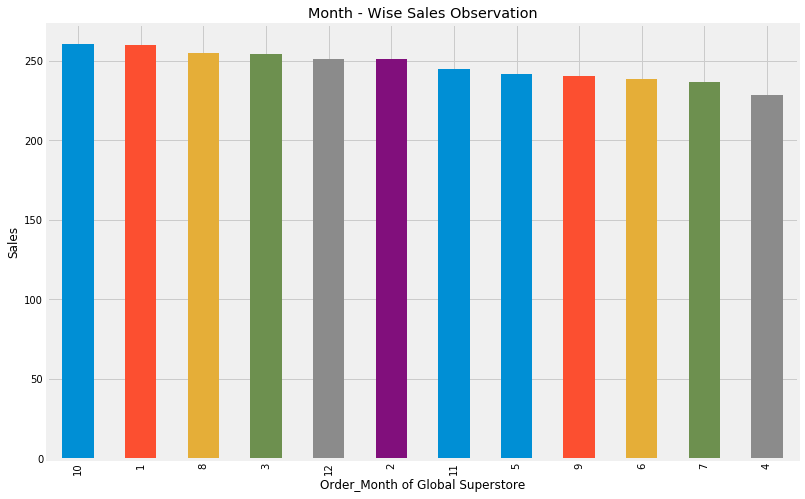

In [16]:
plt.rcParams['figure.figsize'] = (12, 8)
data.groupby(["Order_month"]).mean()["Sales"].nlargest(15).plot(kind="bar")
plt.title('Month - Wise Sales Observation')
plt.xticks(rotation = 90)
plt.xlabel('Order_Month of Global Superstore', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

In [17]:
data.groupby(["Order_month"]).mean()["Sales"]

Order_month
1     259.766707
2     250.802297
3     253.871809
4     228.512009
5     241.262967
6     238.176093
7     236.696727
8     254.791880
9     240.565709
10    260.174696
11    244.603807
12    250.837952
Name: Sales, dtype: float64

- Here from the above graph we can infer that the SALES - Monthwise is `highest` on `October` `(260.174696)` and  `very less` on  `April` `(228.512009)`

- Also, we can visualize that the sales is `high` on `winter seasons` as compare to `summer and rainy season`


###### Year - Wise Actual Sales  Observation

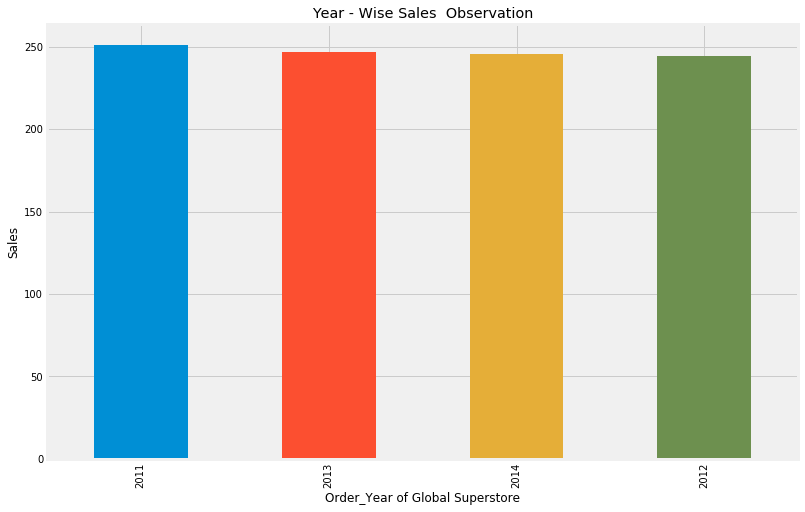

In [18]:
data.groupby(["Order_year"]).mean()["Sales"].nlargest(15).plot(kind="bar")
plt.title('Year - Wise Sales  Observation')
plt.xticks(rotation = 90)
plt.xlabel('Order_Year of Global Superstore', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

In [19]:
data.groupby(["Order_year"]).mean()["Sales"]

Order_year
2011    251.105901
2012    244.247281
2013    246.811106
2014    245.272139
Name: Sales, dtype: float64

- From above graph we can infer that trend of sales is `increasing` in year `2011` then it `decline` to year `2012` again increase in `2013` and decline in `2014`. Seems seasonal pattern

Number of funding per month in decreasing order(Top 10)
 201412    2153
201411    2147
201409    2018
201406    1748
201309    1682
201408    1675
201410    1626
201312    1602
201311    1596
201306    1530
Name: yearmonth, dtype: int64


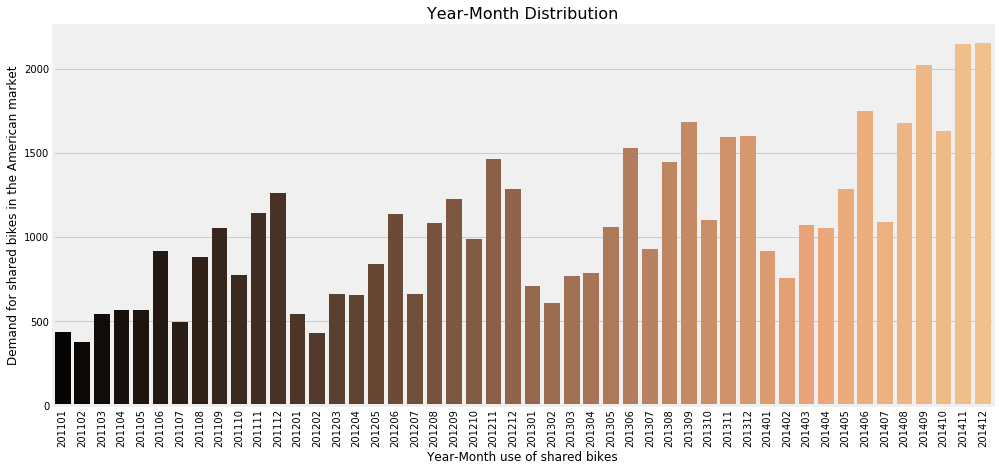

In [20]:
# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Order Date'],
         format='%d-%m-%Y').dt.year*100)+(pd.to_datetime(data['Order Date'],format='%d-%m-%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)

print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()


# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month use of shared bikes', fontsize=12)
plt.ylabel('Demand for shared bikes in the American market', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

- seems seasonal pattern

In [21]:
data.drop("Order Date",inplace=True,axis=1)
data.drop("Order_year",inplace=True,axis=1)
data.drop("Order_month",inplace=True,axis=1)
data.drop("Order_date",inplace=True,axis=1)
data.drop("Segment",inplace=True,axis=1)
data.drop('Market',inplace=True,axis=1)
data.head()

Sales    Profit Year_Month_date   Segment_Market  yearmonth
0  2309.650  762.1845      2012-07-31      Consumer_US     201207
1  3709.395 -288.7650      2013-02-05   Corporate_APAC     201302
2  5175.171  919.9710      2013-10-17    Consumer_APAC     201310
3  2892.510  -96.5400      2013-01-28   Home Office_EU     201301
4  2832.960  311.5200      2013-11-05  Consumer_Africa     201311

- Droping all unnecessary column

###### We will find Coeefficient of Variance:
- Cofficient of Variance = (Standard deviation / mean)

In [22]:
x= data.groupby(data['Segment_Market'])['Profit'].mean()  # we find mean
x

Segment_Market
Consumer_APAC         39.097659
Consumer_Africa       20.063880
Consumer_Canada       47.909406
Consumer_EMEA         10.060116
Consumer_EU           36.384055
Consumer_LATAM        22.671102
Consumer_US           25.836873
Corporate_APAC        39.517891
Corporate_Africa      15.767504
Corporate_Canada      45.786000
Corporate_EMEA         7.941000
Corporate_EU          40.102041
Corporate_LATAM       18.956902
Corporate_US          30.456667
Home Office_APAC      41.309532
Home Office_Africa    22.832849
Home Office_Canada    43.100417
Home Office_EMEA       6.397233
Home Office_EU        34.972973
Home Office_LATAM     22.466216
Home Office_US        33.818664
Name: Profit, dtype: float64

In [23]:
y = data.groupby(data['Segment_Market'])['Profit'].std() # we find standard deviation
y

Segment_Market
Consumer_APAC         164.472190
Consumer_Africa       147.489712
Consumer_Canada       100.311080
Consumer_EMEA         145.279173
Consumer_EU           171.663016
Consumer_LATAM        123.304619
Consumer_US           242.594020
Corporate_APAC        167.212079
Corporate_Africa      147.175983
Corporate_Canada      126.719250
Corporate_EMEA        175.006276
Corporate_EU          191.546678
Corporate_LATAM       109.751300
Corporate_US          231.986266
Home Office_APAC      191.403161
Home Office_Africa    143.027544
Home Office_Canada    136.860734
Home Office_EMEA      139.463057
Home Office_EU        172.198483
Home Office_LATAM     119.887165
Home Office_US        212.381482
Name: Profit, dtype: float64

In [24]:
z=y/x #coefficient of variance is (standard deviation/mean)

In [25]:
df=pd.DataFrame(z)    #store into new DataFrame 
df

Profit
Segment_Market               
Consumer_APAC        4.206702
Consumer_Africa      7.351006
Consumer_Canada      2.093766
Consumer_EMEA       14.441103
Consumer_EU          4.718084
Consumer_LATAM       5.438845
Consumer_US          9.389450
Corporate_APAC       4.231301
Corporate_Africa     9.334133
Corporate_Canada     2.767642
Corporate_EMEA      22.038317
Corporate_EU         4.776482
Corporate_LATAM      5.789517
Corporate_US         7.616929
Home Office_APAC     4.633390
Home Office_Africa   6.264113
Home Office_Canada   3.175392
Home Office_EMEA    21.800527
Home Office_EU       4.923759
Home Office_LATAM    5.336331
Home Office_US       6.280008

In [26]:
z.sort_values()

Segment_Market
Consumer_Canada        2.093766
Corporate_Canada       2.767642
Home Office_Canada     3.175392
Consumer_APAC          4.206702
Corporate_APAC         4.231301
Home Office_APAC       4.633390
Consumer_EU            4.718084
Corporate_EU           4.776482
Home Office_EU         4.923759
Home Office_LATAM      5.336331
Consumer_LATAM         5.438845
Corporate_LATAM        5.789517
Home Office_Africa     6.264113
Home Office_US         6.280008
Consumer_Africa        7.351006
Corporate_US           7.616929
Corporate_Africa       9.334133
Consumer_US            9.389450
Consumer_EMEA         14.441103
Home Office_EMEA      21.800527
Corporate_EMEA        22.038317
Name: Profit, dtype: float64

- After sorting the values, we can able to know that `Consumer_Canada` is found to be the most consistently profitable   

In [27]:
# we only select Consumer_Canada row due to low cofficient of variance

data = data[data['Segment_Market']=='Consumer_Canada']
data.head()

Sales  Profit Year_Month_date   Segment_Market  yearmonth
564   1799.10  593.64      2012-07-07  Consumer_Canada     201207
777   1704.96  272.52      2013-12-22  Consumer_Canada     201312
1091   967.32  270.72      2014-10-08  Consumer_Canada     201410
1178  1513.56  741.60      2012-06-29  Consumer_Canada     201206
1452   551.16   71.64      2011-03-01  Consumer_Canada     201103

In [28]:
data.shape

(202, 5)

In [29]:
# then we sum all data into a single month, which will be helpfull in time series analysis

x = data.groupby('Year_Month_date')[['Sales','Profit']].sum()

In [30]:
df=pd.DataFrame(x) 
df.sort_values(by='Year_Month_date')

Sales  Profit
Year_Month_date                 
2011-01-02        314.22    3.12
2011-02-24         56.91   23.31
2011-03-01       1345.44  311.67
2011-03-08         59.82   23.88
2011-04-14         62.58   19.50
2011-04-21        223.50   35.58
2011-05-03        701.46   77.10
2011-05-20         22.32    0.87
2011-05-21         28.23    0.00
2011-06-24         20.07    7.50
2011-07-09        127.80   47.28
2011-08-11        138.60   43.68
2011-09-21          4.80    1.44
2011-09-23        428.25  121.35
2011-09-26         29.85    6.84
2011-09-27         55.38    4.38
2011-10-03         28.38    5.37
2011-10-30        115.74   30.06
2011-11-01        922.50  135.66
2012-03-20         25.23    6.03
2012-04-02         29.22    9.60
2012-04-16        124.68   17.40
2012-05-01        174.36   23.10
2012-05-16         41.16   11.55
2012-05-30        100.08   18.00
2012-06-02        665.70  277.26
2012-06-04        204.84   66.69
2012-06-07       1084.68  488.10
2012-06-08         21.72    3.90
2012-06-25        231.72   25.80
2012-06-29       2183.43  924.09
2012-07-07       1826.46  599.28
2012-07-17        108.66    2.16
2012-08-20       1290.03  332.49
2012-08-29         44.19    6.30
2012-09-03        152.28   50.22
2012-09-06        127.47    1.26
2012-09-27         26.88   11.28
2012-10-07         96.00   31.68
2012-11-20       1185.69  442.53
2012-11-23         95.16    4.74
2012-11-26        125.40   43.80
2012-11-28        349.32  104.76
2012-12-24        288.60   45.90
2013-01-10        248.82   89.55
2013-01-21        410.88   78.00
2013-01-25        156.03    7.44
2013-01-28        431.46  106.20
2013-02-20          6.90    2.46
2013-02-22        334.11  148.71
2013-03-16         26.10    6.78
2013-03-28        189.84   75.30
2013-06-03        238.02   61.32
2013-06-21         53.28   26.64
2013-06-28        402.36  105.15
2013-07-22        318.57   66.99
2013-07-30        295.74   55.44
2013-08-06         90.24   15.33
2013-08-17        255.78   30.66
2013-08-20        569.19  233.49
2013-08-21        294.54  118.62
2013-08-22         59.40   24.90
2013-09-02        533.61  170.73
2013-09-20         26.40   13.20
2013-10-04        104.97   38.01
2013-10-18        728.76  179.10
2013-10-23        948.87  251.19
2013-11-01        735.48  271.98
2013-11-08         46.05    7.29
2013-11-13        322.38   40.20
2013-11-21        162.30   18.90
2013-12-19         24.36    9.72
2013-12-22       1797.99  309.51
2014-02-11        204.15   53.07
2014-02-18       2264.61  869.55
2014-02-22        277.14   91.44
2014-03-18        391.89  133.47
2014-04-20        148.50   19.26
2014-05-09         51.63    8.76
2014-05-15         63.96   25.02
2014-05-28         17.52    5.43
2014-06-18        228.15   41.40
2014-06-23         66.45   17.43
2014-06-27         69.96    8.28
2014-07-04         41.40   14.76
2014-08-14         80.34    9.99
2014-08-25       1112.25  311.19
2014-09-09         33.42    7.32
2014-09-12        704.01  177.81
2014-09-17         47.97    9.12
2014-10-08       1025.55  295.83
2014-10-30         22.08    3.30
2014-11-14         90.96    2.70
2014-11-18         18.75    8.61
2014-11-27       1986.09  171.75
2014-12-01       1561.47  352.17
2014-12-23         89.46   21.48
2014-12-30         20.16    9.24

In [31]:
df.shape

(98, 2)

In [32]:
ts = df['Sales'] # then we convert dataframe into time series  
ts.head()

Year_Month_date
2011-01-02     314.22
2011-02-24      56.91
2011-03-01    1345.44
2011-03-08      59.82
2011-04-14      62.58
Name: Sales, dtype: float64

In [33]:
ts.shape

(98,)

### Plot the Time series

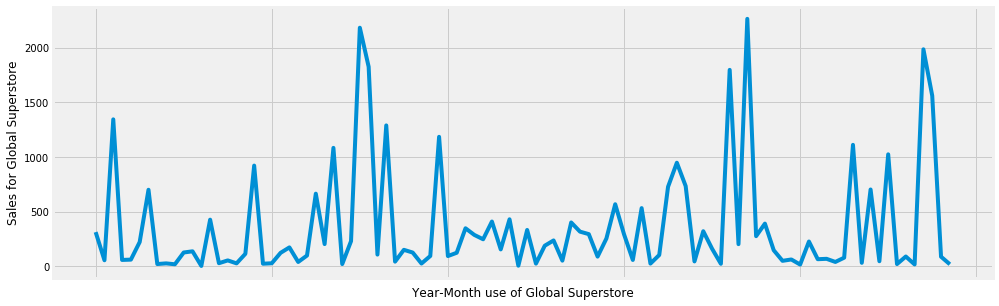

In [34]:
ts.plot(kind="line",figsize=(15,5))
plt.xticks(rotation = 90)
plt.xlabel('Year-Month use of Global Superstore', fontsize=12)
plt.ylabel('Sales for Global Superstore', fontsize=12)
plt.show()

- It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations of period one year.

### Train and Test split

In [35]:
train=ts[0:48] 
test=ts[48:]

In [36]:
train

Year_Month_date
2011-01-02     314.22
2011-02-24      56.91
2011-03-01    1345.44
2011-03-08      59.82
2011-04-14      62.58
2011-04-21     223.50
2011-05-03     701.46
2011-05-20      22.32
2011-05-21      28.23
2011-06-24      20.07
2011-07-09     127.80
2011-08-11     138.60
2011-09-21       4.80
2011-09-23     428.25
2011-09-26      29.85
2011-09-27      55.38
2011-10-03      28.38
2011-10-30     115.74
2011-11-01     922.50
2012-03-20      25.23
2012-04-02      29.22
2012-04-16     124.68
2012-05-01     174.36
2012-05-16      41.16
2012-05-30     100.08
2012-06-02     665.70
2012-06-04     204.84
2012-06-07    1084.68
2012-06-08      21.72
2012-06-25     231.72
2012-06-29    2183.43
2012-07-07    1826.46
2012-07-17     108.66
2012-08-20    1290.03
2012-08-29      44.19
2012-09-03     152.28
2012-09-06     127.47
2012-09-27      26.88
2012-10-07      96.00
2012-11-20    1185.69
2012-11-23      95.16
2012-11-26     125.40
2012-11-28     349.32
2012-12-24     288.60
2013-01-10     2

In [37]:
test

Year_Month_date
2013-02-20       6.90
2013-02-22     334.11
2013-03-16      26.10
2013-03-28     189.84
2013-06-03     238.02
2013-06-21      53.28
2013-06-28     402.36
2013-07-22     318.57
2013-07-30     295.74
2013-08-06      90.24
2013-08-17     255.78
2013-08-20     569.19
2013-08-21     294.54
2013-08-22      59.40
2013-09-02     533.61
2013-09-20      26.40
2013-10-04     104.97
2013-10-18     728.76
2013-10-23     948.87
2013-11-01     735.48
2013-11-08      46.05
2013-11-13     322.38
2013-11-21     162.30
2013-12-19      24.36
2013-12-22    1797.99
2014-02-11     204.15
2014-02-18    2264.61
2014-02-22     277.14
2014-03-18     391.89
2014-04-20     148.50
2014-05-09      51.63
2014-05-15      63.96
2014-05-28      17.52
2014-06-18     228.15
2014-06-23      66.45
2014-06-27      69.96
2014-07-04      41.40
2014-08-14      80.34
2014-08-25    1112.25
2014-09-09      33.42
2014-09-12     704.01
2014-09-17      47.97
2014-10-08    1025.55
2014-10-30      22.08
2014-11-14      

In [38]:
ts

Year_Month_date
2011-01-02     314.22
2011-02-24      56.91
2011-03-01    1345.44
2011-03-08      59.82
2011-04-14      62.58
2011-04-21     223.50
2011-05-03     701.46
2011-05-20      22.32
2011-05-21      28.23
2011-06-24      20.07
2011-07-09     127.80
2011-08-11     138.60
2011-09-21       4.80
2011-09-23     428.25
2011-09-26      29.85
2011-09-27      55.38
2011-10-03      28.38
2011-10-30     115.74
2011-11-01     922.50
2012-03-20      25.23
2012-04-02      29.22
2012-04-16     124.68
2012-05-01     174.36
2012-05-16      41.16
2012-05-30     100.08
2012-06-02     665.70
2012-06-04     204.84
2012-06-07    1084.68
2012-06-08      21.72
2012-06-25     231.72
2012-06-29    2183.43
2012-07-07    1826.46
2012-07-17     108.66
2012-08-20    1290.03
2012-08-29      44.19
2012-09-03     152.28
2012-09-06     127.47
2012-09-27      26.88
2012-10-07      96.00
2012-11-20    1185.69
2012-11-23      95.16
2012-11-26     125.40
2012-11-28     349.32
2012-12-24     288.60
2013-01-10     2

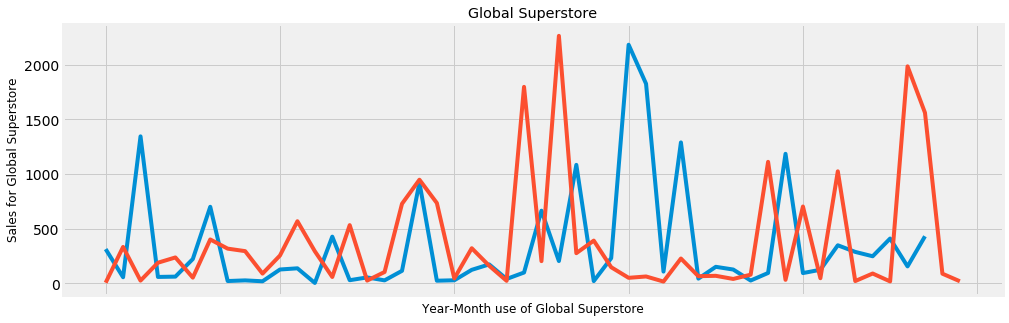

In [39]:
train.plot(figsize=(15,5), title= 'Global Superstore', fontsize=14)
test.plot(figsize=(15,5), title= 'Global Superstore', fontsize=14)

plt.xticks(rotation = 90)
plt.xlabel('Year-Month use of Global Superstore', fontsize=12)
plt.ylabel('Sales for Global Superstore', fontsize=12)
plt.show()

### Simple moving average method

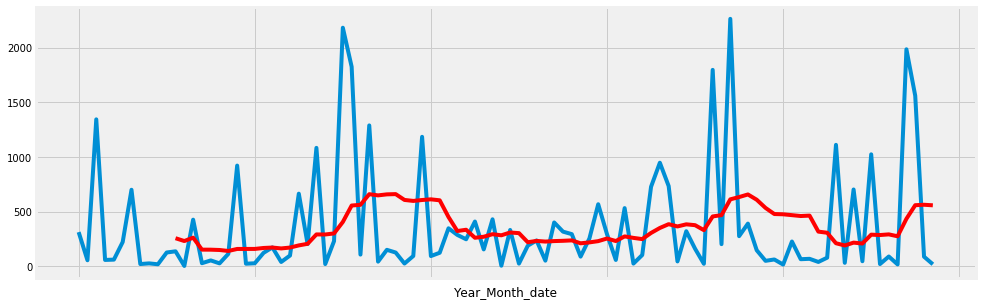

In [40]:
moving_avg = ts.rolling(12).mean()
ts.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.xticks(rotation = 90)
plt.show()

#### Calculate RSME and MAPE

In [41]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, moving_avg[48:])).round(2)
mape = np.round(np.mean(np.abs(test-moving_avg[48:])/test)*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE    MAPE
0  Simple moving average forecast  515.6  476.08

### Decomposition of time series
#### - Multiplicative series
#### - Additive model

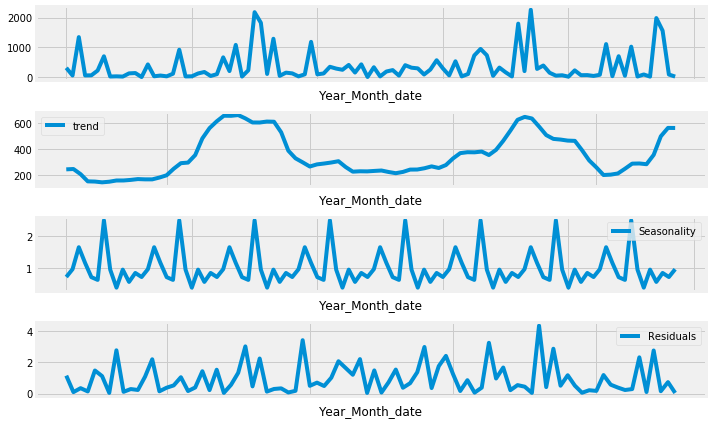

In [42]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(ts,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
ts.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

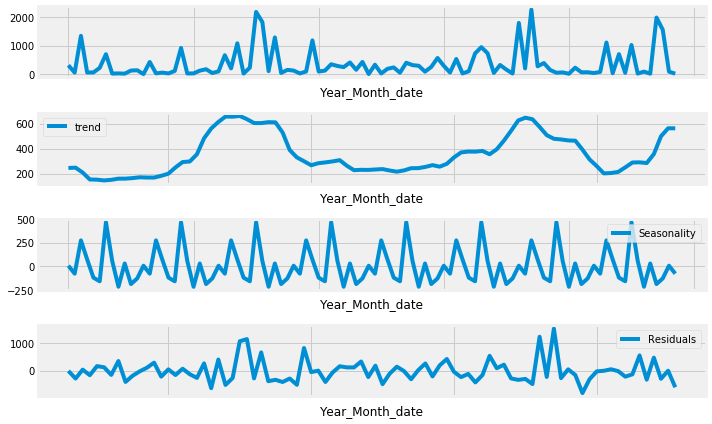

In [43]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(ts,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
ts.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- If we look at the residuals of the additive model closely, it has still some pattern left. 
- The multiplicative model looks quite random which is good. 
- So multiplicative decomposition model should be preferred for this particular time series.

### Smoothing techniques


- It removes the flunctuations or noise from a time series. The flunctuations may be due to seasonal and irregular components.

- By eleminating these two our series reflects only trend and cyclic pattern.

- Since moving average assign equal weight to all data points where as the recent obsn provide more relevant informatiopn than past obsn. So we want a weighting system that assigns decreasing weights to the more distant obsn. For this we use exponential smoothing technique.It gives more weight to recent obs and it decreases exponentially as obs become more distant

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [45]:
# Simple expenential smoothing
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(50)
ses.summary()

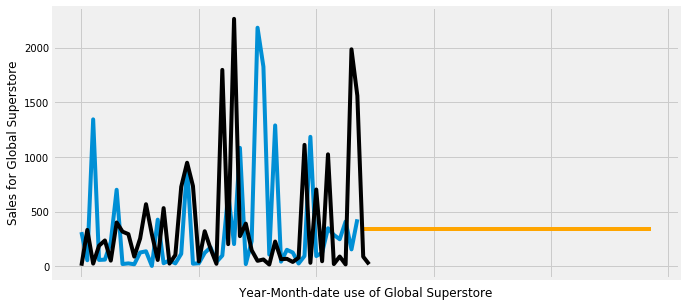

In [46]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')

plt.xticks(rotation = 90)
plt.xlabel('Year-Month-date use of Global Superstore', fontsize=12)
plt.ylabel('Sales for Global Superstore', fontsize=12)

plt.show()

#### Calculate RSME and MAPE

In [47]:
rmse = np.sqrt(mean_squared_error(test, ses1)).round(2)
mape = np.round(np.mean(np.abs(test-ses1)/test)*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Method    RMSE    MAPE
0         Simple moving average forecast  515.60  476.08
0  Simple exponential smoothing forecast  530.76     NaN

#### Holt's exponential smoothing

In [52]:
hes = ExponentialSmoothing(train , trend='add').fit()
hes.summary()

In [53]:
hes1 = hes.forecast(50)

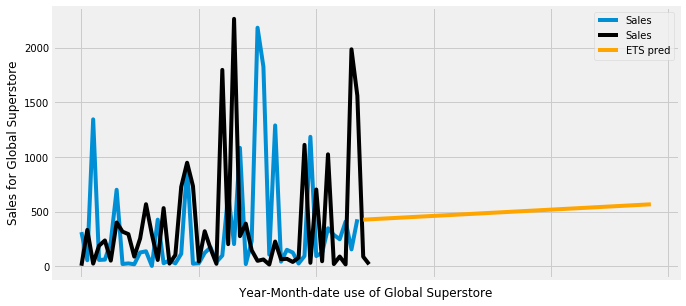

In [54]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

plt.xticks(rotation = 90)
plt.xlabel('Year-Month-date use of Global Superstore', fontsize=12)
plt.ylabel('Sales for Global Superstore', fontsize=12)
plt.show()

#### Calculate RSME and MAPE

In [56]:
rmse = np.sqrt(mean_squared_error(test, hes1)).round(2)
mape = np.round(np.mean(np.abs(test-hes1)/test)*100,2)

tempResults = pd.DataFrame({'Method':['Holts exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0         Simple moving average forecast  515.60  476.08
0  Simple exponential smoothing forecast  530.76     NaN
0     Holts exponential smoothing method  536.67     NaN

#### Holt- Winter exp smoothing

In [57]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal='add').fit()
hwes.summary()

In [58]:
hwes1 = hwes.forecast(50)

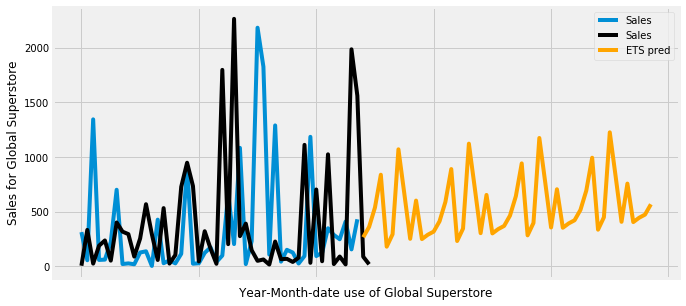

In [59]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

plt.xticks(rotation = 90)
plt.xlabel('Year-Month-date use of Global Superstore', fontsize=12)
plt.ylabel('Sales for Global Superstore', fontsize=12)
plt.show()

#### Calculate RSME and MAPE

In [60]:
rmse = np.sqrt(mean_squared_error(test, hwes1)).round(2)
mape = np.round(np.mean(np.abs(test-hwes1)/test)*100,2)

tempResults = pd.DataFrame({'Method':['Holt- Winter exp smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0         Simple moving average forecast  515.60  476.08
0  Simple exponential smoothing forecast  530.76     NaN
0     Holts exponential smoothing method  536.67     NaN
0             Holt- Winter exp smoothing  598.13     NaN

### Stationarity of time series

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0 : series is nonstationary
# H1 : series is stationary

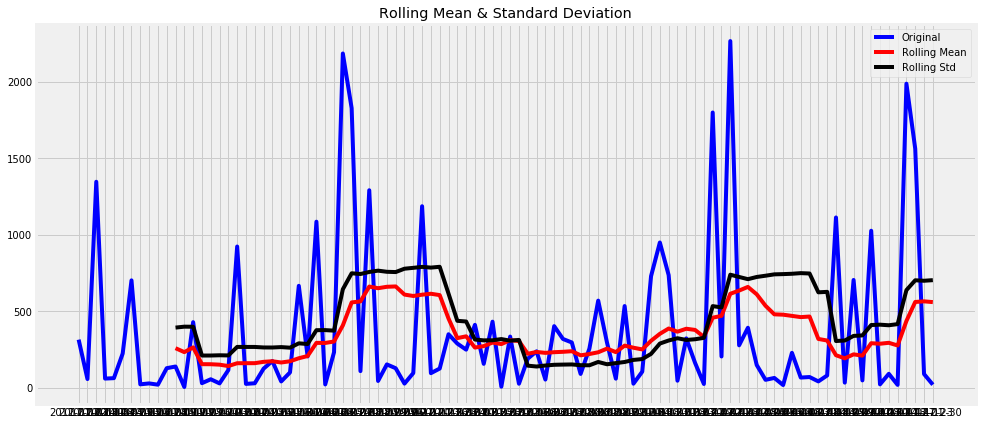

Results of Dickey-Fuller Test:
Test Statistic                -9.283835e+00
p-value                        1.230577e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.700000e+01
Critical Value (1%)           -3.499637e+00
Critical Value (5%)           -2.891831e+00
Critical Value (10%)          -2.582928e+00
dtype: float64


In [63]:
test_stationarity(ts)

- series is `stationary` as mean and std is constatnt.
- `pvalue < 0.05` hence H0 is `rejected` that the series is stationary at 5% level of significance.

### ACF and PACF plots:

In [64]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [65]:
# Calculate ACF and PACF upto 20 lags

lag_acf = acf(ts, nlags=40)
lag_pacf = pacf(ts, nlags=40, method='ols')

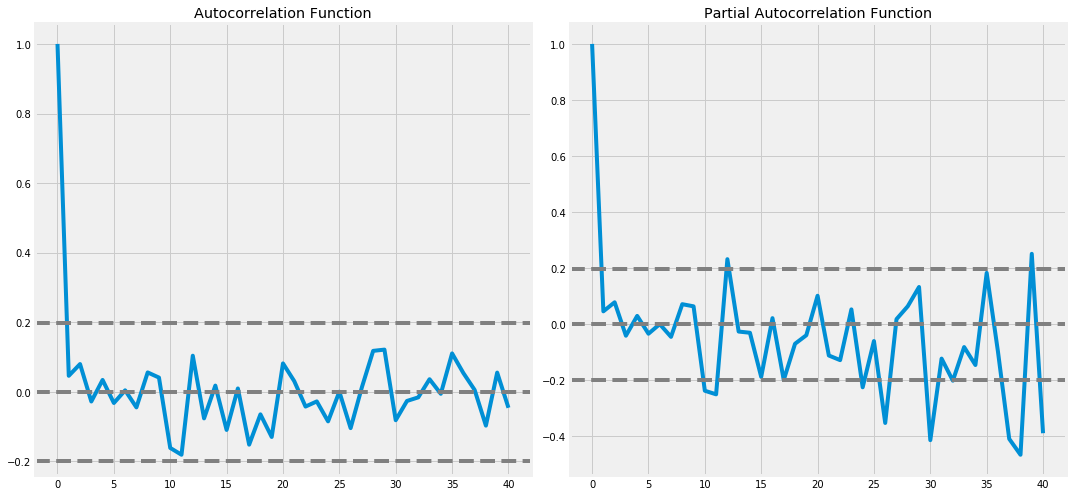

In [66]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

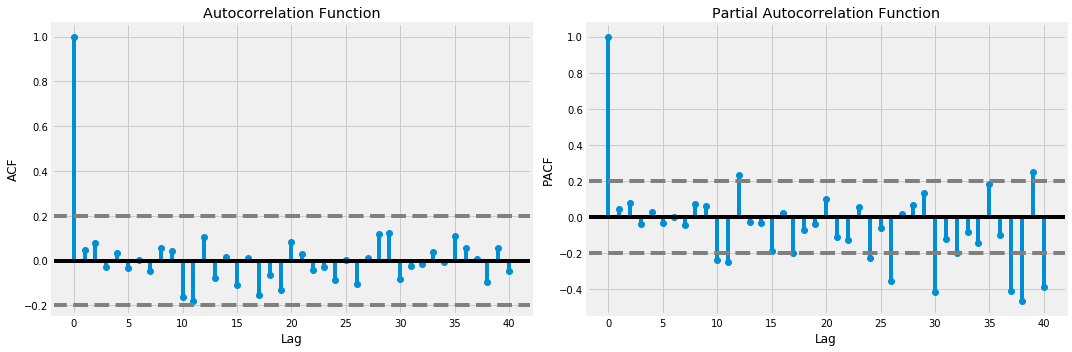

In [67]:
# Calculate ACF and PACF upto 40 lags
lag_acf = acf(ts, nlags=40)
lag_pacf = pacf(ts, nlags=40, method='ols')

#Plot ACF: 
plt.figure(figsize=(15,5))
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.title('Partial Autocorrelation Function');
plt.tight_layout()

- In these above plots, the two dotted lines on either sides of 0 are the confidence interevals. 
- These can be used to determine the ‘p’ and ‘q’ values as:

- p –  The lag value where the PACF curve crosses the upper confidence interval for the first time.
        or;First lag where PACF value above the confidence interval
       in this case p=1
- q – The lag value where the ACF curve crosses the upper confidence interval for the first time. 
      or; the first lag where the ACF value is above the significance level.
       in this case q=1.


### ARIMA model

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
model = ARIMA(train, order=(1,1,1))
model_fit=model.fit(disp=True)

In [70]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -359.657
Method:                       css-mle   S.D. of innovations            489.916
Date:                Thu, 22 Oct 2020   AIC                            727.314
Time:                        20:59:38   BIC                            734.715
Sample:                             1   HQIC                           730.099
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5332      5.629      0.805      0.425      -6.500      15.566
ar.L1.D.Sales     0.0994      0.146      0.682      0.499      -0.186       0.385
ma.L1.D.Sales    -1.0000      0.074    -

In [71]:
forecast = model_fit.forecast(steps=24)[0]
print(forecast)

[453.53909422 459.81686898 464.52350924 469.07393068 473.60881918
 478.14216324 482.67535373 487.20852896 491.74170266 496.27487622
 500.80804976 505.34122329 509.87439683 514.40757037 518.94074391
 523.47391744 528.00709098 532.54026452 537.07343806 541.60661159
 546.13978513 550.67295867 555.2061322  559.73930574]


### Seasonal-ARIMA model

- ARIMA doesn not support seasonality . If our data has defined seasonality then we go for S-ARIMA.
- Seasonal differencing is like regular diff but instead of subtracting consecutive terms we subtract the values from previous season

 parameters in SARIMA(p,d,q)(P,D,Q)[S]
 P - seasonal AR
 D - seasonal differencing
 Q - seasonal MA
 S is the frequency of time series

- p is equal to the first lag where the PACF value is above the significance level.
- d is the minimum order of difference to make the series stationary.
- q is equal to the first lag where the ACF value is above the significance level

- S is equal to the ACF lag with the highest value (typically at a high lag).
- D=1 if the series has a stable seasonal pattern over time.
- D=0 if the series has an unstable seasonal pattern over time.
- Rule of thumb: d+D≤2
- P≥1 if the ACF is positive at lag S, else P=0.
- Q≥1 if the ACF is negative at lag S, else Q=0.
- Rule of thumb: P+Q≤2

In [72]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)

In [73]:
model_fit=model.fit(disp=False)

In [74]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -261.765
Date:                            Thu, 22 Oct 2020   AIC                            531.530
Time:                                    20:59:40   BIC                            537.635
Sample:                                         0   HQIC                           533.612
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0722      0.203      0.356      0.722      -0.326       0.470
ma.L1         -0.8060      0.126   

In [77]:
forecast = model_fit.forecast(steps=30)
print(forecast)

48    232.482085
49    192.427229
50    209.396854
51    492.672283
52    209.100767
53    216.963580
54    275.188602
55    259.399814
56    249.055974
57    291.195808
58    224.928151
59    296.547145
60    244.807690
61    234.392381
62    238.804927
63    312.463938
64    238.727936
65    240.772473
66    255.912500
67    251.807002
68    249.117334
69    260.074791
70    242.843469
71    261.466279
72    248.012669
73    245.304417
74    246.451794
75    265.605061
76    246.431774
77    246.963407
dtype: float64


- We conclude that, Seasonal-ARIMA model forecast is able to predict the sales closer to the actual values and whose MAPE values is the least among all the methods done in the ARIMA

According to the flow chart, 
- we saw that when we perform simple moving average, MAPE value is more which indicate seasionalty in data .
- And when we have less historical data due to the selection of only 1 market segment according to lower value of cofficient of variance. So we move to ARIMA and Exponential Smoothing technique. 
- So when it follows trend, in seasonal we done Holt winter's exponential smooting and Holt's exponential smoothing. For not following trend we also done simple exponential smoothing.
- And finally in ARIMA, we perform seasonal ARIMA.

- And through RMSE and MAPE method, 
                                   the least MAPE is Holt-Winter exp smoothing = 0 and RMSE = 598.13
                                   more MAPE value in Simple moving average forecast = 476.08 and RMSE = 515.60